<a href="https://colab.research.google.com/github/Frederico-Gribaudi/MVP_Frederico_Gribaudi_Sprint_Machine_Learning/blob/main/sprint_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MVP: *Machine Learning & Analytics*
**Autor:** Frederico Francesco Gribaudi Cardozo







# **1) Descrição do Problema**

O conjunto de dados escolhido é multivariado e consiste em resultados de testes psicológicos, que categoriza pessoas em três tipos distintos de personalidade: introvertido, extrovertido e ambivertido. O objetivo principal é classificar o tipo de personalidade com base em resultados de testes psicológicos considerando vinte e nove características.

## 1.1 Seleção de Dados

O dataset escolhido estava listado como "trending dataset" no site kaggle, e tem sido usado por pessoas que estão aprendendo ou praticando *Machine Learning*. Link para o dataset:  [Introvert, Extrovert & Ambivert Classification](https://www.kaggle.com/datasets/miadul/introvert-extrovert-and-ambivert-classification/data)

## 1.2 Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características, o objetivo é prever a qual das três personalidades uma pessoa se encaixa.

## 1.3 Atributos do Dataset

O dataset contém 20,000 amostras, com  quantidades de amostras similares de cada uma das três personalidades, **34%** de extrovertidos, **33%** de introvertidos e **33%** de ambivertidos.

Possui trinta atributos:

* **personality type**: tipo de personalidade
* **social energy**: energia social
* **alone time preference**: preferência por solidão
* **talkativeness**: gostar de falar
* **deep reflection**: reflexão profunda
* **group comfort**: confortável ao estar em grupo
* **party liking**: gostar de festejar
* **listening skill**: habilidade de escuta
* **empathy**: empatia
* **creativity**: criatividade
* **organization**: organização
* **leadership**: liderança
* **risk taking**: propensão ao risco
* **public speaking comfort**: confortável ao falar em público
* **curiosity**: curiosidade
* **routine preference**: preferência por rotina
* **excitement seeking**: busca por excitação
* **friendliness**: amigável
* **emotional stability**: estabilidade emocional
* **planning**: planejamento
* **spontaneity**: espontaneidade
* **adventurousness**: espírito aventureiro
* **reading habit**: hábito de leitura
* **sports interest**: interesse por esportes
* **online social usage**: uso de redes sociais
* **travel desire**: desejo de viajar
* **gadget usage**: uso de dispositivos eletrônicos
* **work style collaborative**: estilo colaborativo de trabalho
* **decision speed**: velocidade na tomada de decisões
* **stress handling**: habilidade de lidar com o estresse

Exceto por **personality type** que é uma variável categórica, todas as colunas tem valores númericos variando entre 0 e 10 baseado no resultado de testes psicológicos.

# **2) Importação das Bibliotecas Necessárias, Carga de Dados e Ambiente**

## 2.1 Bibliotecas Necessárias

In [1]:
# Configuração para não exibir warnings
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas principais
import os, sys, time, random, math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Pré-processamento
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Modelos de classificação
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    ExtraTreesClassifier,
    VotingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestRegressor
)
from sklearn.dummy import DummyClassifier

# Seleção de atributos
from sklearn.feature_selection import (
    SelectKBest, # para a Seleção Univariada
    f_classif, # para o teste ANOVA da Seleção Univariada
    RFE # para a Eliminação Recursiva de Atributos
)

# Validação e busca de hiperparâmetros
from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedKFold,
    cross_val_score,
    GridSearchCV,
)

# Métricas
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    ConfusionMatrixDisplay
)

# Configuração global
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

print("Python:", sys.version.split()[0])
print("Seed global:", SEED)


Python: 3.12.11
Seed global: 42


## 2.2 Dados: carga, entendimento e qualidade

In [2]:
# URL do dataset
url = 'https://raw.githubusercontent.com/Frederico-Gribaudi/MVP_Frederico_Gribaudi_Sprint_analise_exploratoria/refs/heads/main/personality_synthetic_dataset.csv'

# Carregando o DataFrame
df = pd.read_csv(url)

# visualização das primeiras linhas
df.head()

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084


In [3]:
# Tradução dos nomes das colunas para o português
novos_nomes = {
    'personality_type': 'tipo_de_personalidade',
    'social_energy': 'energia_social',
    'alone_time_preference': 'preferencia_por_solidao',
    'talkativeness': 'gostar_de_falar',
    'deep_reflection': 'reflexao_profunda',
    'group_comfort': 'confortavel_ao_estar_em_grupo',
    'party_liking': 'gostar_de_festejar',
    'listening_skill': 'habilidade_de_escuta',
    'empathy': 'empatia',
    'creativity': 'criatividade',
    'organization': 'organizacao',
    'leadership': 'lideranca',
    'risk_taking': 'propensao_ao_risco',
    'public_speaking_comfort': 'confortavel_ao_falar_em_publico',
    'curiosity': 'curiosidade',
    'routine_preference': 'preferencia_por_rotina',
    'excitement_seeking': 'busca_por_excitacao',
    'friendliness': 'amigavel',
    'emotional_stability': 'estabilidade_emocional',
    'planning': 'planejamento',
    'spontaneity': 'espontaneidade',
    'adventurousness': 'espirito_aventureiro',
    'reading_habit': 'habito_de_leitura',
    'sports_interest': 'interesse_por_esportes',
    'online_social_usage': 'uso_de_redes_sociais',
    'travel_desire': 'desejo_de_viajar',
    'gadget_usage': 'uso_de_dispositivos_eletronicos',
    'work_style_collaborative': 'estilo_colaborativo_de_trabalho',
    'decision_speed': 'velocidade_na_tomada_de_decisoes',
    'stress_handling': 'habilidade_de_lidar_com_o_estresse'
}

# Renomeando as colunas
df.rename(columns=novos_nomes, inplace=True)

# Visualizando as novas colunas
print("Novos nomes das colunas:")
print(df.columns.tolist())

# Traduzindo os valores da coluna 'tipo_de_personalidade'
df['tipo_de_personalidade'] = df['tipo_de_personalidade'].replace({
    'Introvert': 'introvertido',
    'Extrovert': 'extrovertido',
    'Ambivert': 'ambivertido'
})

# Padronização completa para evitar problemas com espaços nas strings
df['tipo_de_personalidade'] = df['tipo_de_personalidade'].astype(str).str.strip()

print("\nValores da coluna 'tipo_de_personalidade' após a tradução:")
print(df['tipo_de_personalidade'].unique())


Novos nomes das colunas:
['tipo_de_personalidade', 'energia_social', 'preferencia_por_solidao', 'gostar_de_falar', 'reflexao_profunda', 'confortavel_ao_estar_em_grupo', 'gostar_de_festejar', 'habilidade_de_escuta', 'empatia', 'criatividade', 'organizacao', 'lideranca', 'propensao_ao_risco', 'confortavel_ao_falar_em_publico', 'curiosidade', 'preferencia_por_rotina', 'busca_por_excitacao', 'amigavel', 'estabilidade_emocional', 'planejamento', 'espontaneidade', 'espirito_aventureiro', 'habito_de_leitura', 'interesse_por_esportes', 'uso_de_redes_sociais', 'desejo_de_viajar', 'uso_de_dispositivos_eletronicos', 'estilo_colaborativo_de_trabalho', 'velocidade_na_tomada_de_decisoes', 'habilidade_de_lidar_com_o_estresse']

Valores da coluna 'tipo_de_personalidade' após a tradução:
['extrovertido' 'ambivertido' 'introvertido']


In [4]:
# visualização das primeiras linhas
df.head(10)

,tipo_de_personalidade,energia_social,preferencia_por_solidao,gostar_de_falar,reflexao_profunda,confortavel_ao_estar_em_grupo,gostar_de_festejar,habilidade_de_escuta,empatia,criatividade,...,espontaneidade,espirito_aventureiro,habito_de_leitura,interesse_por_esportes,uso_de_redes_sociais,desejo_de_viajar,uso_de_dispositivos_eletronicos,estilo_colaborativo_de_trabalho,velocidade_na_tomada_de_decisoes,habilidade_de_lidar_com_o_estresse
0,extrovertido,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,ambivertido,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,ambivertido,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,extrovertido,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,introvertido,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084
5,introvertido,2.807173,6.326097,2.770085,5.617670,4.752116,0.302630,7.137657,5.399156,4.564805,...,3.888344,1.868406,9.188567,4.817574,3.427446,4.674632,4.027299,3.048724,2.774809,4.560962
6,introvertido,1.537468,7.605496,4.294666,9.166947,3.085335,1.042874,10.000000,5.899131,5.423302,...,7.906636,3.173683,9.458013,2.272047,5.218917,2.745851,4.056359,5.695608,3.230287,6.761266
7,ambivertido,6.636632,4.350586,7.131511,5.455061,2.530413,3.081656,5.177344,5.692996,3.951603,...,3.643867,7.601721,5.803109,5.024010,7.029383,6.990230,7.147859,4.680890,5.107637,7.246737
8,extrovertido,7.330318,2.820421,5.224400,5.053459,7.969032,9.106934,6.717555,7.061661,7.591541,...,4.459566,6.996722,5.980063,9.638288,5.509409,7.513645,8.788241,9.300327,8.086807,5.784908
9,ambivertido,5.377395,4.762184,4.244447,6.399885,4.781680,6.074592,10.000000,5.601565,4.927993,...,7.586472,5.513111,5.950501,2.328848,5.644438,6.251067,3.539273,5.698559,4.079389,6.609341


In [5]:
# visualização das últimas linhas
df.tail(10)

,tipo_de_personalidade,energia_social,preferencia_por_solidao,gostar_de_falar,reflexao_profunda,confortavel_ao_estar_em_grupo,gostar_de_festejar,habilidade_de_escuta,empatia,criatividade,...,espontaneidade,espirito_aventureiro,habito_de_leitura,interesse_por_esportes,uso_de_redes_sociais,desejo_de_viajar,uso_de_dispositivos_eletronicos,estilo_colaborativo_de_trabalho,velocidade_na_tomada_de_decisoes,habilidade_de_lidar_com_o_estresse
19990,extrovertido,8.102639,4.936379,9.580971,4.126549,6.350055,7.071409,4.670796,5.810679,3.961426,...,6.878814,5.574323,5.738097,3.631943,7.339986,5.924529,8.103198,7.748880,4.824774,6.089649
19991,ambivertido,5.250918,4.461787,5.953458,3.751218,5.297386,1.601640,9.748382,5.622223,4.525821,...,6.508603,4.274182,4.130920,8.532600,5.500215,5.653765,6.823472,6.208961,3.673498,3.856171
19992,introvertido,2.601940,8.589375,3.055787,7.537710,4.915021,4.430060,6.370154,9.000249,5.151677,...,5.974863,5.038454,9.182229,5.867759,3.756668,2.908530,2.469546,6.360303,1.877201,7.522244
19993,extrovertido,8.338994,5.608843,9.105338,4.657886,6.368701,7.016968,5.555118,4.619253,7.014191,...,6.745272,9.605230,2.555031,7.315834,8.413087,5.786300,8.029673,8.879529,7.353383,7.061337
19994,ambivertido,6.297109,6.625004,5.269047,7.098544,6.734609,6.541744,6.612903,7.659161,7.026331,...,5.445954,5.447236,6.942709,8.272175,6.236847,4.484729,6.205859,4.139596,8.119065,7.613383
19995,ambivertido,3.783857,4.345803,8.220063,6.297798,5.162622,5.702266,5.518356,3.420139,5.811565,...,8.521256,4.355973,6.454815,2.557365,6.949292,4.176390,5.649897,5.665498,5.252077,4.297520
19996,introvertido,2.621406,8.152097,2.954341,8.791467,2.670252,2.931244,5.855202,5.044124,6.244061,...,4.818308,2.631298,10.000000,3.697801,3.217559,3.638815,5.177155,5.106628,0.982214,5.873321
19997,introvertido,0.039689,8.277160,5.728101,7.790080,3.427897,0.708457,7.099321,5.784592,5.400400,...,3.318511,4.071008,9.974147,2.954407,5.427296,6.270830,3.793430,5.009167,3.810962,5.678412
19998,extrovertido,7.756725,3.956191,8.906972,3.793775,7.608467,6.292705,6.824980,5.653421,7.347820,...,7.156525,8.148780,3.840900,6.093418,7.814507,8.428745,8.736932,8.060841,8.161087,5.941793
19999,introvertido,3.225794,8.058594,0.000000,10.000000,6.363376,0.242722,9.307219,7.621912,5.919581,...,5.097344,2.720616,7.344312,5.566736,6.350940,2.997643,5.991222,3.964673,1.967942,5.810435


Checando as primeiras e as últimas 10 entradas, tudo indica que o dataset foi corretamente carregado em um dataframe.

## 2.3 Funções python

In [6]:
def evaluate_classification(y_true, y_pred, proba=None):
    acc = accuracy_score(y_true, y_pred)
    f1w = f1_score(y_true, y_pred, average="weighted")
    auc = roc_auc_score(y_true, proba, multi_class='ovr') if (proba is not None and proba.shape[1]==2) else np.nan
    return {"accuracy": acc, "f1_weighted": f1w, "roc_auc": auc}

def selecionar_melhor_modelo(saved_models, X_test, y_test, metric='accuracy'):
    best_model = None
    best_model_name = None
    best_metric = 0.0

    for model_name in saved_models:
        try:
            model = joblib.load(f'saved_models/{model_name}.pkl')
            y_pred = model.predict(X_test)

            # Seleção baseada na métrica escolhida
            if metric == 'accuracy':
                score = accuracy_score(y_test, y_pred)
            elif metric == 'f1_weighted':
                score = f1_score(y_test, y_pred, average='weighted')
            else:
                raise ValueError("Métrica inválida. Use 'accuracy' ou 'f1_weighted'.")

            if score > best_metric:
                best_metric = score
                best_model = model
                best_model_name = model_name

        except Exception as e:
            print(f"Erro ao processar {model_name}: {e}")

    return best_model, best_model_name, best_metric


# **3) Análise Exploratória**


## 3.1 Total e Tipo das Instâncias

O dataset possui **20,000** instâncias (observações), com **6,570** instâncias para introvertido, **6,857** instâncias para extrovertido e **6,573** instâncias para ambivertido. Todas as características psicológicas são de tipo numérico (float), exceto pelo atributo 'tipo de personalidade' que é categórico.

In [7]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 20000

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   tipo_de_personalidade               20000 non-null  object 
 1   energia_social                      20000 non-null  float64
 2   preferencia_por_solidao             20000 non-null  float64
 3   gostar_de_falar                     20000 non-null  float64
 4   reflexao_profunda                   20000 non-null  float64
 5   confortavel_ao_estar_em_grupo       20000 non-null  float64
 6   gostar_de_festejar                  20000 non-null  float64
 7   habilidade_de_escuta                20000 non-null  float64
 8   empatia                             20000 non-null  float64
 9   criatividade                        20000 non-null  float64
 10  organizacao                         20000 non-null 

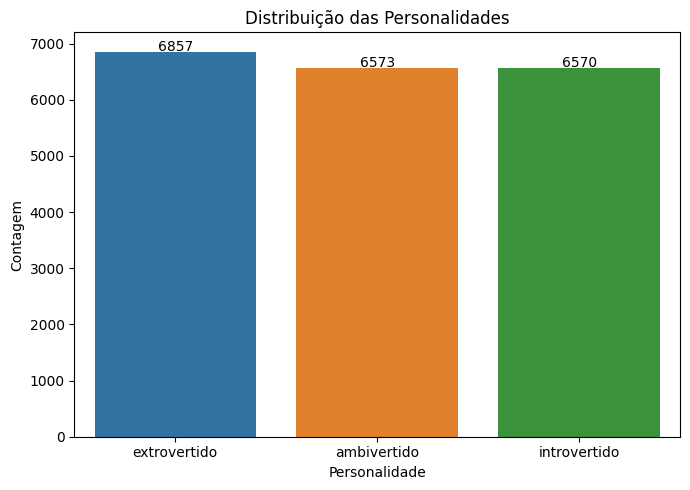

In [8]:
# Criação do gráfico
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='tipo_de_personalidade', hue='tipo_de_personalidade', data=df, legend=False)

# Adicionando os valores no topo de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # posição horizontal (centro da barra)
        height + 5,                      # altura acima da barra
        int(height),
        ha='center'
    )

# Personalização dos eixos e título
plt.title('Distribuição das Personalidades')
plt.xlabel('Personalidade')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

O gráfico de barras mostra que cada personalidade apresenta valores similares, calculando podemos ver que:

*   Extrovertidos = 6857/20000 = **34,285%**
*   Ambivertidos = 6573/20000 = **32,865%**
*   Introvertidos = 6570/20000 = **32,850%**

Confirmando que o dataset é balanceado em termos de classes.

## 3.2 Análise do histograma dos atributos

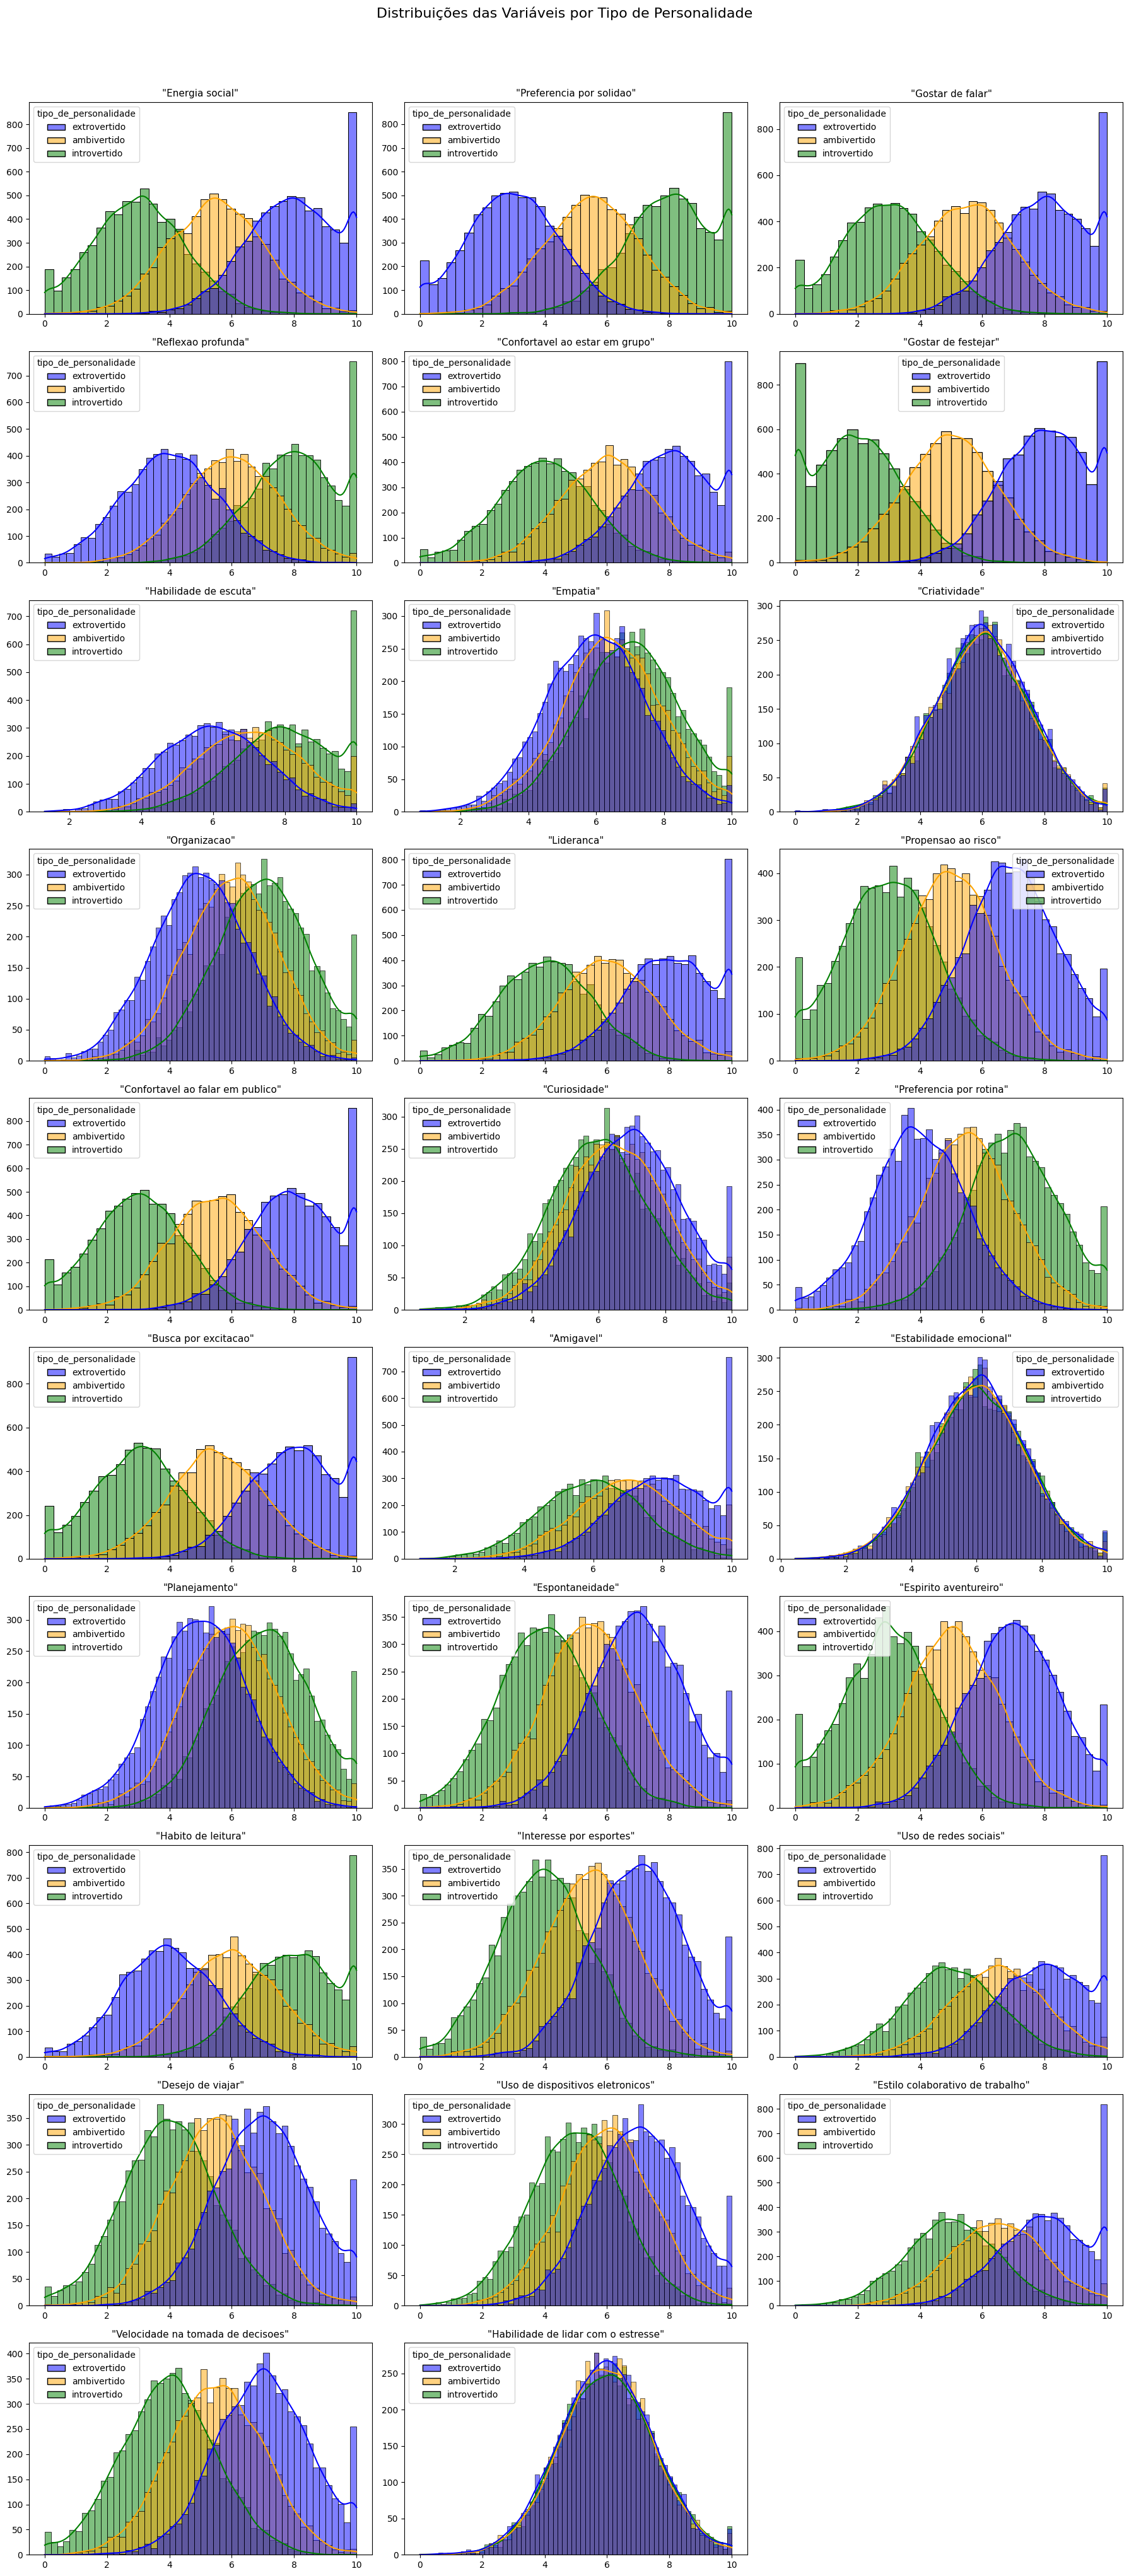

In [9]:
# Tipos e cores
tipos = ['introvertido', 'extrovertido', 'ambivertido']
cores = {
    'introvertido': 'green',
    'extrovertido': 'blue',
    'ambivertido': 'orange'
}

# Lista de variáveis numéricas
variaveis = df.select_dtypes(include='number').columns.tolist()
n = len(variaveis)

# Configurações de grid
cols = 3
rows = math.ceil(n / cols)

# Criando a grade de subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

for i, var in enumerate(variaveis):
    sns.histplot(
        data=df,
        x=var,
        hue='tipo_de_personalidade',
        kde=True,
        element='bars',
        stat='count',
        common_norm=False,
        palette=cores,
        ax=axes[i]
    )
    axes[i].set_title(f'"{var.replace("_", " ").capitalize()}"', fontsize=11)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove subplots vazios, se existirem
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Legenda geral
handles, labels = axes[0].get_legend_handles_labels()
plt.suptitle('Distribuições das Variáveis por Tipo de Personalidade', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


As curvas de densidade estimada (KDE) indicam que as distribuições são em sua grande maioria multimodais. As características que são mais claras as separações entre os diferentes tipos de personalidade para o grupo escolhido de características:
* "energia social"
* "preferência por solidão"
* "gostar de falar"
* "reflexão profunda"
* "confortável ao estar em grupo"
* "gostar de festejar"
* "liderança"
* "propensão ao risco"
* "confortável ao falar em público"
* "busca por excitação"
* "espírito aventureiro"
* "interesse por esportes"
* "hábito de leitura"

De forma análoga, nem todas tem uma separação tão boa entre os tipos de personalidade, logo podem ser descartadas como características-chave, por exemplo:

* "habilidade de lidar com o estresse"
* "estabilidade emocional"
* "curiosidade"
* "criatividade"
* "empatia"





## 3.3 Boxplot

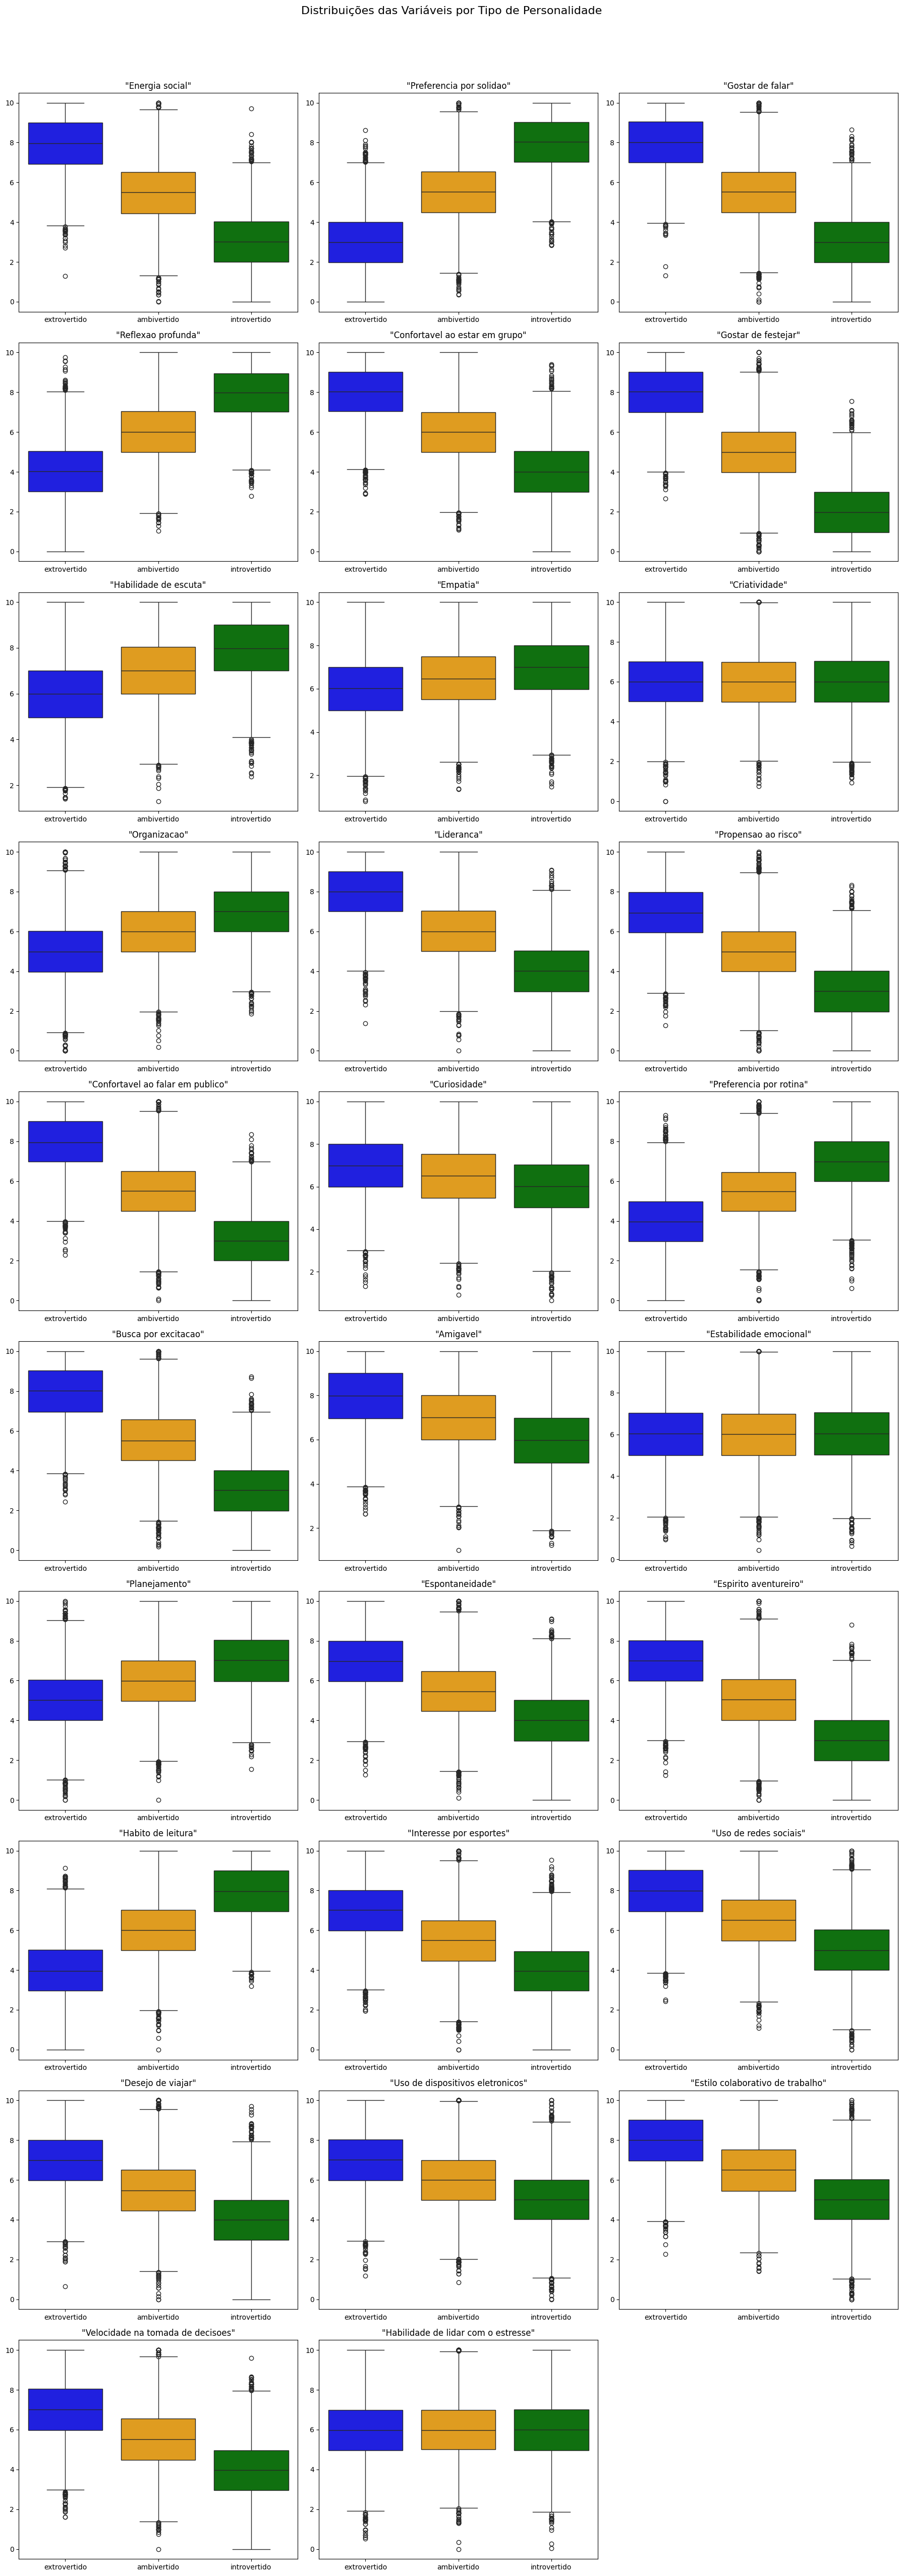

In [10]:
# Dicionário de cores
cores = {
    'introvertido': 'green',
    'extrovertido': 'blue',
    'ambivertido': 'orange'
}

# Lista de variáveis numéricas
variaveis = df.select_dtypes(include='number').columns.tolist()
n = len(variaveis)

# Definindo número de colunas e linhas para o grid
cols = 3
rows = math.ceil(n / cols)

# Criando os subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
axes = axes.flatten()  # transforma em vetor para iterar

for i, var in enumerate(variaveis):
    sns.boxplot(
        data=df,
        x='tipo_de_personalidade',
        y=var,
        hue='tipo_de_personalidade',
        palette=cores,
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f'"{var.replace("_", " ").capitalize()}"', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove subplots vazios (caso o número de variáveis não seja múltiplo de cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Legenda geral
handles, labels = axes[0].get_legend_handles_labels()
plt.suptitle('Distribuições das Variáveis por Tipo de Personalidade', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


O boxplot das características mostra que nem todas tem uma separação tão boa entre os tipos de personalidade, logo podem ser descartadas como características-chave, por exemplo:

* "habilidade de lidar com o estresse"
* "estabilidade emocional"
* "curiosidade"
* "criatividade"
* "empatia"

Em contrapartida verifica-se que as seguintes características tem uma separação boa, considerando principalmente os valores de Q1 e Q3:

* "energia social"
* "preferência por solidão"
* "gostar de falar"
* "reflexão profunda"
* "confortável ao estar em grupo"
* "gostar de festejar"
* "liderança"
* "propensão ao risco"
* "confortável ao falar em público"
* "busca por excitação"
* "espírito aventureiro"
* "hábito de leitura"

Observa-se também que existem outliers em todos as características, o que indica que a classificação de tipo de personalidade depende de uma combinação de características e não apenas de uma predominante.


##  3.4 Matriz de Correlação

In [11]:
#Criando a matriz de correlação com todas as colunas
df.iloc[:, 1:30].corr()

,energia_social,preferencia_por_solidao,gostar_de_falar,reflexao_profunda,confortavel_ao_estar_em_grupo,gostar_de_festejar,habilidade_de_escuta,empatia,criatividade,organizacao,...,espontaneidade,espirito_aventureiro,habito_de_leitura,interesse_por_esportes,uso_de_redes_sociais,desejo_de_viajar,uso_de_dispositivos_eletronicos,estilo_colaborativo_de_trabalho,velocidade_na_tomada_de_decisoes,habilidade_de_lidar_com_o_estresse
energia_social,1.000000,-0.654726,0.657548,-0.595024,0.600819,0.696256,-0.391711,-0.210702,0.003439,-0.381587,...,0.516319,0.602295,-0.593950,0.515184,0.513714,0.505383,0.385225,0.505482,0.511334,-0.001252
preferencia_por_solidao,-0.654726,1.000000,-0.658442,0.598747,-0.606488,-0.702538,0.395045,0.209842,-0.000802,0.394110,...,-0.518212,-0.599756,0.606381,-0.523267,-0.512948,-0.519675,-0.398298,-0.509340,-0.526784,0.002054
gostar_de_falar,0.657548,-0.658442,1.000000,-0.595642,0.602341,0.699113,-0.396942,-0.206566,0.000732,-0.395587,...,0.510880,0.605093,-0.605081,0.523663,0.515386,0.511840,0.392204,0.513349,0.519035,-0.002229
reflexao_profunda,-0.595024,0.598747,-0.595642,1.000000,-0.545189,-0.635852,0.359396,0.189660,0.007595,0.359004,...,-0.459011,-0.543586,0.546049,-0.466185,-0.464402,-0.459070,-0.355450,-0.460659,-0.470996,0.002721
confortavel_ao_estar_em_grupo,0.600819,-0.606488,0.602341,-0.545189,1.000000,0.643558,-0.368349,-0.189119,0.008365,-0.359493,...,0.468917,0.545587,-0.555507,0.479155,0.466763,0.464743,0.362587,0.475264,0.475904,-0.005268
gostar_de_festejar,0.696256,-0.702538,0.699113,-0.635852,0.643558,1.000000,-0.413945,-0.221757,-0.000558,-0.415305,...,0.546361,0.635631,-0.640000,0.555671,0.539368,0.543858,0.414924,0.542184,0.549641,-0.012387
habilidade_de_escuta,-0.391711,0.395045,-0.396942,0.359396,-0.368349,-0.413945,1.000000,0.124744,-0.010125,0.224087,...,-0.306856,-0.351312,0.357068,-0.307160,-0.307916,-0.307071,-0.237891,-0.299893,-0.298741,-0.008031
empatia,-0.210702,0.209842,-0.206566,0.189660,-0.189119,-0.221757,0.124744,1.000000,-0.013908,0.134095,...,-0.168120,-0.187131,0.194420,-0.165008,-0.160410,-0.164178,-0.125468,-0.172934,-0.167321,-0.003407
criatividade,0.003439,-0.000802,0.000732,0.007595,0.008365,-0.000558,-0.010125,-0.013908,1.000000,0.003087,...,0.001773,0.003576,0.003189,-0.002150,-0.008520,0.002487,0.000121,0.003696,0.001499,-0.000754
organizacao,-0.381587,0.394110,-0.395587,0.359004,-0.359493,-0.415305,0.224087,0.134095,0.003087,1.000000,...,-0.303235,-0.353344,0.360127,-0.302548,-0.300454,-0.303142,-0.236453,-0.304044,-0.298850,0.016673


Como a quantidade de colunas é muito grande , a visualização em uma única matriz fica comprometida, portanto optou-se por fazer duas matrizes, uma filtrando valores de correlação moderada 0.5 ≤ |r| e outra filtrando correlação forte 0.7 ≤ |r|.

In [12]:
# Calculando a matriz de correlação completa
corr_matrix = df.iloc[:, 1:30].corr()

# Definindo um limite de corte
limite_moderada = 0.5
limite_forte = 0.7

# Criando uma máscara onde apenas correlações moderadas permanecem
filtro_moderada = corr_matrix.where((corr_matrix.abs() >= limite_moderada) & (corr_matrix.abs() < 1.0))

# Criando uma máscara onde apenas correlações fortes permanecem
filtro_forte = corr_matrix.where((corr_matrix.abs() >= limite_forte) & (corr_matrix.abs() < 1.0))

# Selecionando apenas as colunas que têm pelo menos uma correlação moderada a muito forte
cols_moderadas = filtro_moderada.columns[filtro_moderada.notna().any()].tolist()
cols_fortes = filtro_forte.columns[filtro_forte.notna().any()].tolist()


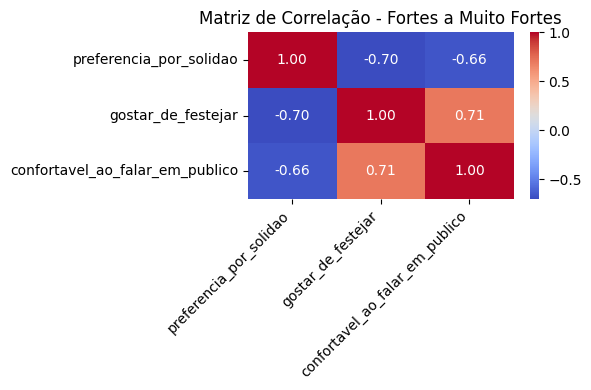

In [13]:
# Criação dos gráfico para correlações fortes a muito fortes
plt.figure(figsize=(6, 4))
sns.heatmap(df[cols_fortes].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Fortes a Muito Fortes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

O mapa de calor da 'Matriz de Correlação -  Fortes a Muito Fortes' revela as maiores correlações entre as características:

* positiva entre *gostar de festejar* e *confortável ao falar em público*, ou seja ambas tendem a ter valores parecidos, indicando que pertencem a mesma personalidade.

* negativa entre *preferência por solidão* ou *confortável ao falar em público* e *gostar de festejar*, logo quando uma tem valor alto, podemos excluir a personalidade da outra, por exemplo, valores altos de *gostar de festejar* implicam em valores baixos de *preferência por solidão*, nesse caso levando a uma personalidade extrovertida.


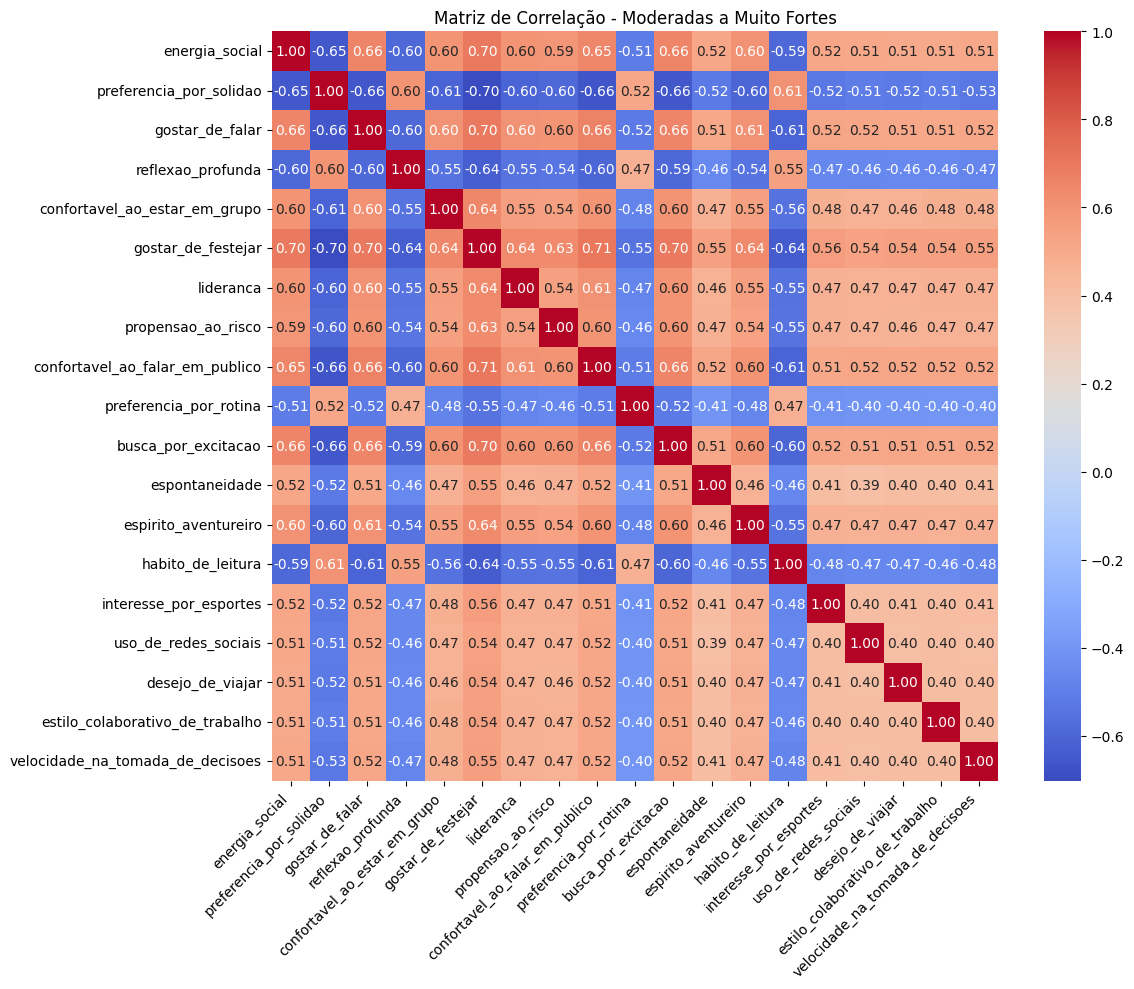

In [14]:
# Criação do gráfico para correlações moderadas a muito fortes
plt.figure(figsize=(12, 10))
sns.heatmap(df[cols_moderadas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Moderadas a Muito Fortes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observando a 'Matriz de Correlação - Moderadas a Muito Forte' podemos considerar algumas características com valores razoáveis para serem considerados característica-chave:
* "energia social"
* "gostar de falar"
* "reflexão profunda"
* "confortável ao estar em grupo"
* "liderança"
* "propensão ao risco"
* "preferência por rotina"
* "busca por excitação"
* "espontaneidade"
* "espírito aventureiro"
* "hábito de leitura"
* "interesse por esportes"
* "uso de redes sociais"
* "desejo de viajar"
* "estilo colaborativo de trabalho"
* "velocidade na tomada de decisões"


# **4) Tratamento de dados**

## 4.1 Nulos

In [15]:
# Verificando a presença de valores nulos no dataset original
print("Valores nulos no dataset:")
df.isnull().sum()

Valores nulos no dataset:


,0
tipo_de_personalidade,0
energia_social,0
preferencia_por_solidao,0
gostar_de_falar,0
reflexao_profunda,0
confortavel_ao_estar_em_grupo,0
gostar_de_festejar,0
habilidade_de_escuta,0
empatia,0
criatividade,0


Como podemos observar acima, não existem valores nulos, na etapa de análise vimos também que os valores estão dentro da faixa esperada, sem valores incoerentes ou errados, não havendo necessidade de tratamento.

## 4.2 Outliers

Não realizou-se nenhum tratamento para outliers, eles estão presentes em todas as características, logo conclui-se que a classificação de personalidade depende de um conjunto de características-chave, então a remoção de qualquer entrada seria prejudicial aos dados.

## 4.3 Definição do target, variáveis e divisão dos dados

In [16]:
# Definição do target
target = 'tipo_de_personalidade'
features = [c for c in df.columns if c not in [target]]

print("Target:", target)
print("N features:", len(features))

# Divisão dos dados
X = np.array(df.iloc[:, 1:].copy())
y = np.array(df.iloc[:, 0].copy())

# Lista de nomes das colunas
col_names = df.columns[1:].tolist()

test_size = 0.20 # tamanho do conjunto de teste

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size, shuffle=True, random_state=SEED, stratify=y) # holdout com estratificação

print("Treino:", X_train.shape, "| Teste:", X_test.shape)

Target: tipo_de_personalidade
N features: 29
Treino: (16000, 29) | Teste: (4000, 29)


A coluna "tipo de personalidade" é o target, pois é nela que realmente está a classificação do indivíduo.

# **5) Treinamento dos modelos**

## 5.1 Criação do baseline e modelos candidatos

O modelo a ser usado como **baseline simples** é o DummyClassifier e na sequência evoluindo para modelos mais fortes.

Baseline: 0.342875 (0.000306)
KNN: 0.996312 (0.001324)
LR: 0.996562 (0.001459)
CART: 0.941687 (0.006626)
NB: 0.997250 (0.001192)
SVC: 0.997500 (0.001083)


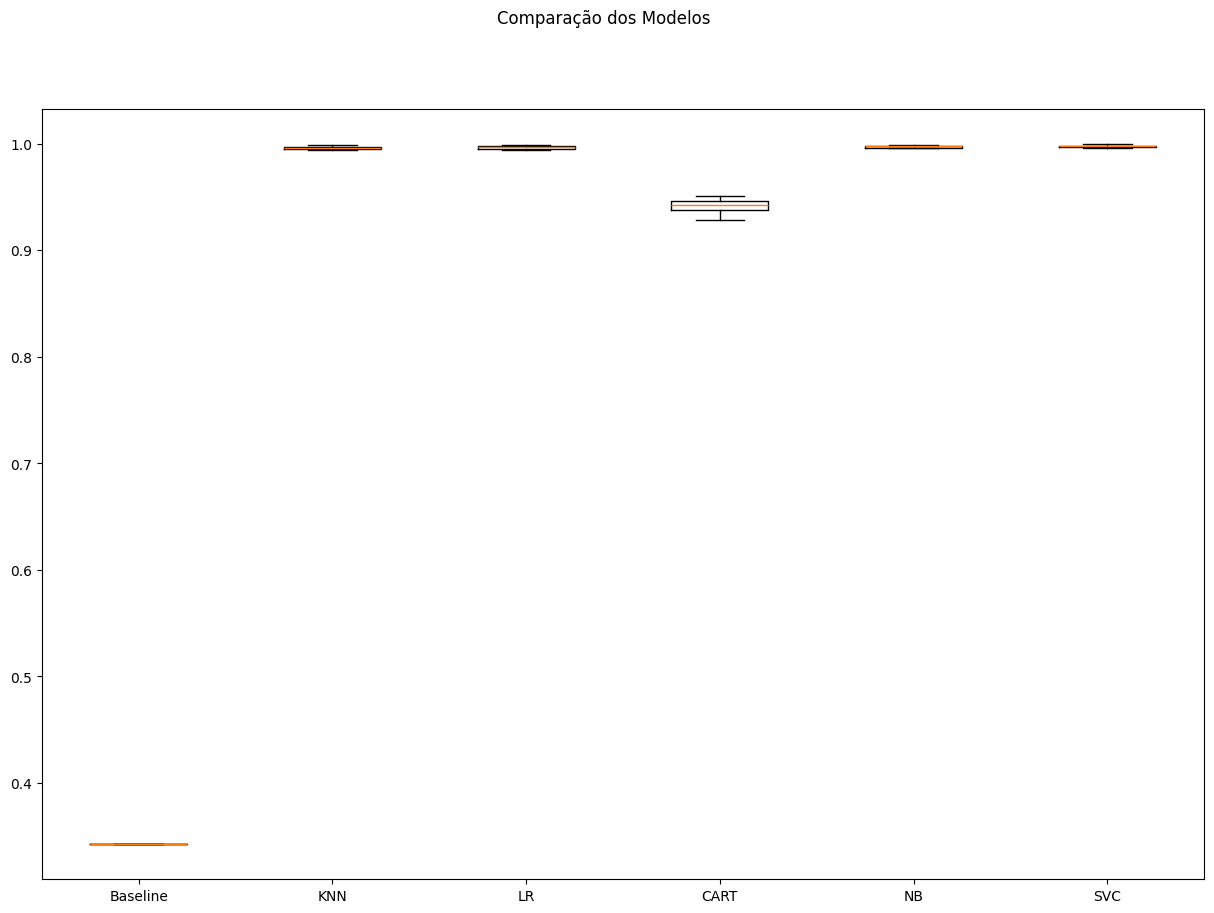

In [17]:
#Criação e preparação dos modelos e seus resultados
models = []
results = []
names = []

models.append(("Baseline",DummyClassifier(strategy="most_frequent", random_state=SEED)))
models.append(("KNN",KNeighborsClassifier()))
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(("CART",DecisionTreeClassifier()))
models.append(("NB",GaussianNB()))
models.append(("SVC",SVC()))

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=SEED) # validação cruzada com estratificação

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Podemos ver acima que o **baseline** teve uma acurácia muito inferior em relação aos outros métodos.
Todos os modelos tiveram uma acurácia muito alta, então para evitar que houvesse **overfitting** decidiu-se por fazer uma análise de PCA (Principal Component Analysis).

SelectKBest - Top 7 atributos: ['energia_social', 'preferencia_por_solidao', 'gostar_de_falar', 'gostar_de_festejar', 'confortavel_ao_falar_em_publico', 'busca_por_excitacao', 'habito_de_leitura']
RFE - Top 7 atributos: ['energia_social', 'preferencia_por_solidao', 'gostar_de_falar', 'reflexao_profunda', 'gostar_de_festejar', 'confortavel_ao_falar_em_publico', 'busca_por_excitacao']
ExtraTrees - Top 7 atributos: ['gostar_de_festejar', 'busca_por_excitacao', 'energia_social', 'gostar_de_falar', 'preferencia_por_solidao', 'confortavel_ao_falar_em_publico', 'confortavel_ao_estar_em_grupo']


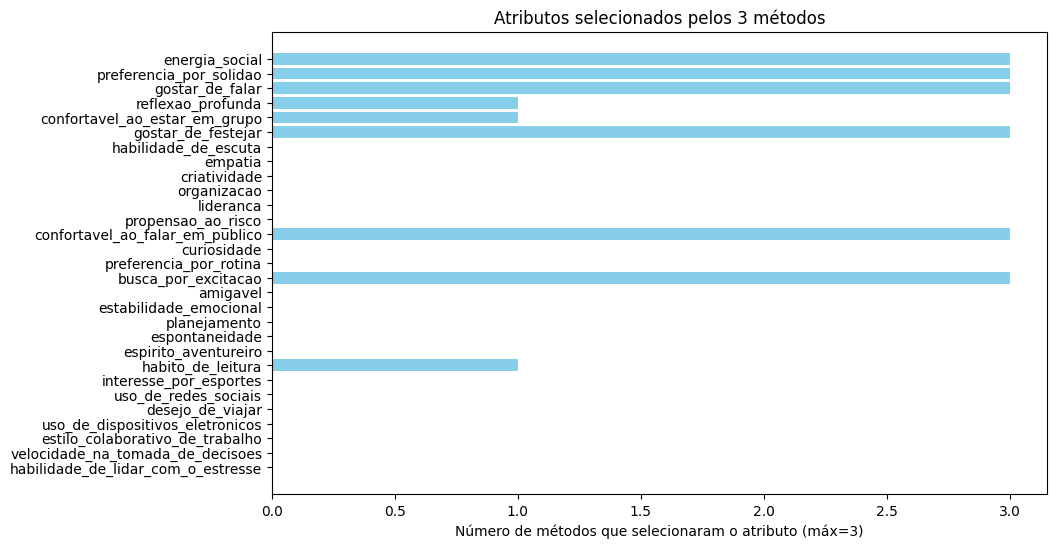

In [18]:
# -------------------------------
# 1️⃣ SelectKBest
# -------------------------------
best_var = SelectKBest(score_func=f_classif, k=7)
fit_skb = best_var.fit(X, y)
top7_skb = np.array(col_names)[best_var.get_support()].tolist()
print("SelectKBest - Top 7 atributos:", top7_skb)

# -------------------------------
# 2️⃣ RFE
# -------------------------------
modelo_lr = LogisticRegression(max_iter=200)
rfe = RFE(modelo_lr, n_features_to_select=7)
fit_rfe = rfe.fit(X, y)
top7_rfe = np.array(col_names)[fit_rfe.support_].tolist()
print("RFE - Top 7 atributos:", top7_rfe)

# -------------------------------
# 3️⃣ ExtraTrees
# -------------------------------
modelo_et = ExtraTreesClassifier(n_estimators=100, random_state=42)
modelo_et.fit(X, y)
feature_importance = pd.DataFrame({
    'Atributo': col_names,
    'Importancia': modelo_et.feature_importances_
}).sort_values(by='Importancia', ascending=False)
top7_et = feature_importance.head(7)['Atributo'].tolist()
print("ExtraTrees - Top 7 atributos:", top7_et)

# -------------------------------
# 4️⃣ Combinar resultados
# -------------------------------
df_atributos = pd.DataFrame({'Atributo': col_names})
df_atributos['SelectKBest'] = df_atributos['Atributo'].isin(top7_skb)
df_atributos['RFE'] = df_atributos['Atributo'].isin(top7_rfe)
df_atributos['ExtraTrees'] = df_atributos['Atributo'].isin(top7_et)
df_atributos['Total'] = df_atributos[['SelectKBest','RFE','ExtraTrees']].sum(axis=1)

# -------------------------------
# 5️⃣ Plotagem
# -------------------------------
plt.figure(figsize=(10,6))
plt.barh(df_atributos['Atributo'], df_atributos['Total'], color='skyblue')
plt.xlabel('Número de métodos que selecionaram o atributo (máx=3)')
plt.title('Atributos selecionados pelos 3 métodos')
plt.gca().invert_yaxis()
plt.show()

Baseando-se no resultado da análise acima, optou-se por reduzir a quantidade de atributos para 6:
* "energia social"
* "preferencia por solidão"
* "gostar de falar"
* "busca por excitação"
* "gostar de festejar"
* "confortavel ao falar em público"

Portanto, é necessário refazer a etapa de definição do target e das variáveis, bem como a separação das bases de treino e de testes.

## 5.2 Separando novamente os dados

In [19]:
# -------------------------------
# 1️⃣ Definição do target e features
# -------------------------------
target = 'tipo_de_personalidade'
selected_features = [
    'energia_social',
    'preferencia_por_solidao',
    'gostar_de_falar',
    'busca_por_excitacao',
    'gostar_de_festejar',
    'confortavel_ao_falar_em_publico'
]

print("Target:", target)
print("N features:", len(selected_features))

# -------------------------------
# 2️⃣ Divisão dos dados
# -------------------------------
X = np.array(df[selected_features].copy())  # apenas as 6 colunas escolhidas
y = np.array(df[target].copy())             # target

# Lista de nomes das colunas (para referência nos métodos de seleção)
col_names = selected_features.copy()

# -------------------------------
# 3️⃣ Holdout com estratificação
# -------------------------------
test_size = 0.20  # 20% para teste

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_size,
    shuffle=True,
    random_state=SEED,
    stratify=y
)

print("Treino:", X_train.shape, "| Teste:", X_test.shape)

Target: tipo_de_personalidade
N features: 6
Treino: (16000, 6) | Teste: (4000, 6)


## 5.3 Treino e avaliação rápida

KNN: 0.972563 (0.003997)
LR: 0.975313 (0.002975)
CART: 0.942438 (0.005806)
NB: 0.975625 (0.002546)
SVC: 0.974938 (0.003671)


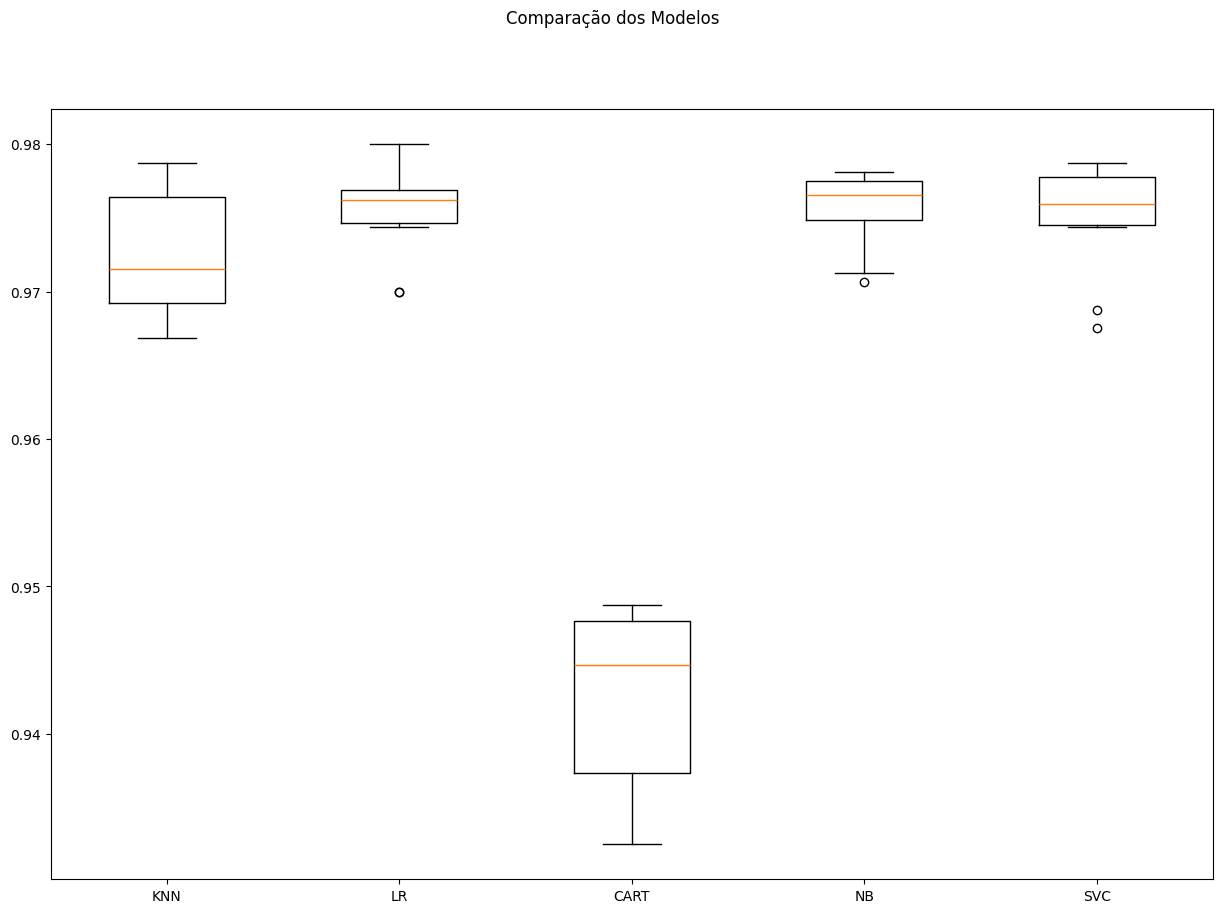

In [20]:
#Criação e preparação dos modelos e seus resultados
models = []
results = []
names = []

models.append(("KNN",KNeighborsClassifier()))
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(("CART",DecisionTreeClassifier()))
models.append(("NB",GaussianNB()))
models.append(("SVC",SVC()))

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=SEED) # validação cruzada com estratificação

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

A diferença entre as acurácias antes e depois de remover as colunas comprovam que havia de fato um **overfitting**, e agora os resultados aparentam ser mais realísticos.


## 5.4 Otimização de hiperparâmetros

### 5.4.1 Tunning do LR

In [21]:
# Tunning do LR

# Treina o modelo
lr = LogisticRegression(max_iter=200, solver="lbfgs")
lr.fit(X_train, y_train)

# Número de iterações até convergir
print("Iterações usadas:", lr.n_iter_)

# Verifica se chegou no limite
if lr.n_iter_[0] >= lr.max_iter:
    print("⚠️ O modelo NÃO convergiu dentro do limite de max_iter.")
else:
    print("✅ O modelo convergiu antes de atingir max_iter.")

Iterações usadas: [87]
✅ O modelo convergiu antes de atingir max_iter.


O modelo precisou de 87 iterações para convergir para uma solução, portanto, podemos ver que o parâmetro de iterações escolhido inicialmente de 200 foi suficiente.

### 5.4.2 Tunning do SVC

In [22]:
# Tuning do SVC

svc = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.001],
  }

grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',  # pode trocar para f1, roc_auc, etc.
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor score:", grid_search.best_score_)

best_svc = grid_search.best_estimator_

Melhores hiperparâmetros: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Melhor score: 0.9756874999999999


Os hiperparâmetros a serem usados
no método SVC são: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

### 5.4.3 Tunning do KNN

In [23]:
# Tuning do KNN

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': range(1,130,5), # Checando melhores valores de k, considerando raíz quadrada de 16000 (número de amostras de teste), a cada 5 pontos.
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

knn-orig - Melhor: 0.975688 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 96}
knn-padr - Melhor: 0.975688 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 96}
knn-norm - Melhor: 0.975688 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 96}


Os hiperparâmetros a serem usados
no método KNN são: 'KNN__metric': 'euclidean', 'KNN__n_neighbors': 96

### 5.4.5 Definição dos modelos e criação dos pipelines

Abaixo serão realizados testes com outros métodos e também realizando padronização e normalização para tentar alcançar uma acurácia maior.

LR-orig: 0.975 (0.003)
KNN-orig: 0.976 (0.002)
CART-orig: 0.942 (0.005)
NB-orig: 0.976 (0.003)
SVM-orig: 0.975 (0.003)
Bag-orig: 0.969 (0.003)
RF-orig: 0.972 (0.004)
ET-orig: 0.973 (0.004)
Ada-orig: 0.966 (0.004)
GB-orig: 0.974 (0.004)
Voting-orig: 0.976 (0.003)
LR-padr: 0.975 (0.003)
KNN-padr: 0.976 (0.002)
CART-padr: 0.941 (0.006)
NB-padr: 0.976 (0.003)
SVM-padr: 0.975 (0.003)
Bag-padr: 0.970 (0.004)
RF-padr: 0.972 (0.003)
ET-padr: 0.973 (0.003)
Ada-padr: 0.966 (0.004)
GB-padr: 0.974 (0.004)
Voting-padr: 0.976 (0.003)
LR-norm: 0.976 (0.003)
KNN-norm: 0.976 (0.002)
CART-norm: 0.942 (0.006)
NB-norm: 0.976 (0.003)
SVM-norm: 0.975 (0.003)
Bag-norm: 0.969 (0.003)
RF-norm: 0.972 (0.003)
ET-norm: 0.973 (0.004)
Ada-norm: 0.966 (0.004)
GB-norm: 0.974 (0.004)
Voting-norm: 0.976 (0.003)

Ranking dos modelos por acurácia média:
         Modelo  Acurácia Média  Desvio Padrão
0      KNN-orig        0.975688       0.002460
1      KNN-norm        0.975688       0.002460
2      KNN-padr        0.9756

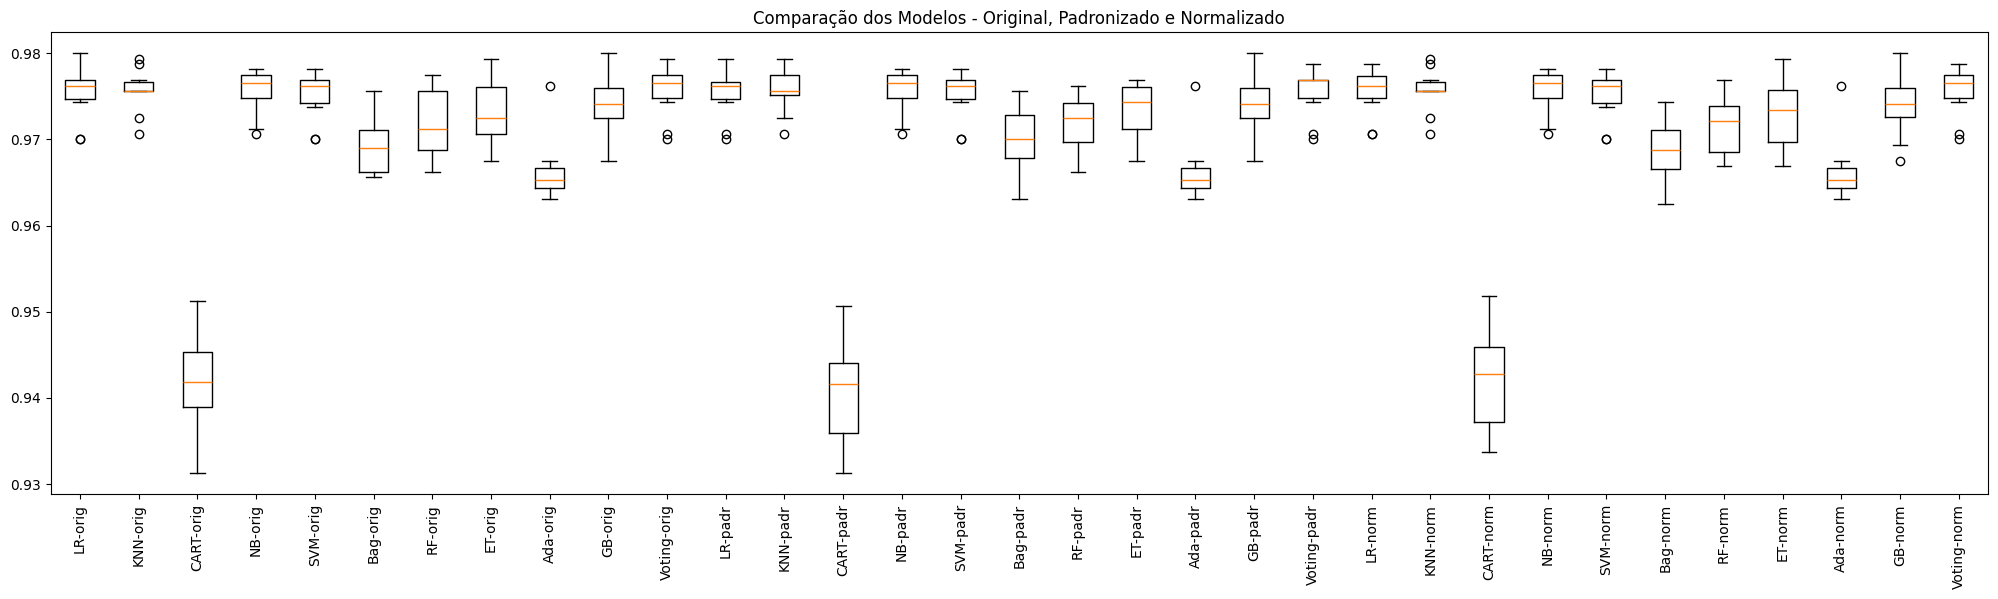

In [24]:
# -------------------------------
# Definição dos modelos
# -------------------------------
num_trees = 100
max_features = 3
base = DecisionTreeClassifier()

voting_bases = [
    ('LR', LogisticRegression(max_iter=200)),
    ('NB', GaussianNB()),
    ('SVM', SVC(C= 100, gamma= 'scale', kernel= 'linear',probability=True,random_state=SEED)),
    ('KNN', KNeighborsClassifier(n_neighbors=96, metric='euclidean'))
]

modelos = {
    'LR': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(n_neighbors=96, metric='euclidean'),
    'CART': DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'SVM': SVC(C= 100, gamma= 'scale', kernel= 'linear',probability=True,random_state=SEED),
    'Bag': BaggingClassifier(estimator=base, n_estimators=num_trees),
    'RF': RandomForestClassifier(n_estimators=num_trees, max_features=max_features),
    'ET': ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features),
    'Ada': AdaBoostClassifier(n_estimators=num_trees),
    'GB': GradientBoostingClassifier(n_estimators=num_trees),
    'Voting': VotingClassifier(voting_bases)
}

transformacoes = {
    'orig': None,
    'padr': StandardScaler(),
    'norm': MinMaxScaler()
}

# -------------------------------
# Criando pipelines
# -------------------------------
pipelines = []
for t_nome, transf in transformacoes.items():
    for m_nome, modelo in modelos.items():
        nome = f"{m_nome}-{t_nome}"
        steps = [(m_nome, modelo)] if transf is None else [(t_nome, transf), (m_nome, modelo)]
        pipelines.append((nome, Pipeline(steps)))

# -------------------------------
# Avaliação com cross-validation
# -------------------------------
results = []
names = []
scores_cv = []

for name, pipe in pipelines:
    cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    scores_cv.append({
        'Modelo': name,
        'Acurácia Média': cv_results.mean(),
        'Desvio Padrão': cv_results.std()
    })
    print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

df_scores_cv = pd.DataFrame(scores_cv).sort_values(by='Acurácia Média', ascending=False).reset_index(drop=True)
print("\nRanking dos modelos por acurácia média:")
print(df_scores_cv)

# -------------------------------
# Avaliação final em X_test com tempo de treino
# -------------------------------
scores_final = []

for name, pipe in pipelines:
    start_time = time.time()
    pipe.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = pipe.predict(X_test)
    try:
        proba = pipe.predict_proba(X_test)
    except:
        proba = None

    metrics = evaluate_classification(y_test, y_pred, proba)
    scores_final.append({
        'modelo': name,
        'accuracy': round(metrics['accuracy'],3),
        'f1_weighted': round(metrics['f1_weighted'],3),
        'roc_auc': round(metrics['roc_auc'],3) if proba is not None else None,
        'train_time_s': round(train_time,3)
    })

df_scores_final = pd.DataFrame(scores_final).set_index('modelo').sort_values(by='accuracy', ascending=False)
print("\nRanking final dos modelos:")
print(df_scores_final)

# -------------------------------
# Boxplot
# -------------------------------
plt.figure(figsize=(25,6))
plt.title('Comparação dos Modelos - Original, Padronizado e Normalizado')
plt.boxplot(results)
plt.xticks(range(1,len(names)+1), names, rotation=90)
plt.show()

Diversos modelos chegaram aos mesmos resultados, **LR-orig**,**KNN-orig**, **SVM-orig**, **LR-padr**,**KNN-padr**, **SVM-padr**,**Voting-padr**,**KNN-norm**,**LR-norm**,**SVM-norm**,**Voting-norm** tiveram a maior acurácia **97,6%**.
Podemos observar que os modelos de forma geral tiveram desempenhos muito parecidos, exceto pela **árvore de decisão (CART)**, que independente de como tratados os dados ficaram abaixo dos demais alcançando acurácia máxima de **94,5%**.


## 5.5 Salvando os pipelines treinados

In [25]:
# Criar pasta de salvamento
save_path = "saved_models"
os.makedirs(save_path, exist_ok=True)

# Salvar cada pipeline já treinado
for name, pipe in pipelines:
    filename = f"{save_path}/{name}.pkl"
    joblib.dump(pipe, filename)
    print(f"{name} salvo em {filename}")

LR-orig salvo em saved_models/LR-orig.pkl
KNN-orig salvo em saved_models/KNN-orig.pkl
CART-orig salvo em saved_models/CART-orig.pkl
NB-orig salvo em saved_models/NB-orig.pkl
SVM-orig salvo em saved_models/SVM-orig.pkl
Bag-orig salvo em saved_models/Bag-orig.pkl
RF-orig salvo em saved_models/RF-orig.pkl
ET-orig salvo em saved_models/ET-orig.pkl
Ada-orig salvo em saved_models/Ada-orig.pkl
GB-orig salvo em saved_models/GB-orig.pkl
Voting-orig salvo em saved_models/Voting-orig.pkl
LR-padr salvo em saved_models/LR-padr.pkl
KNN-padr salvo em saved_models/KNN-padr.pkl
CART-padr salvo em saved_models/CART-padr.pkl
NB-padr salvo em saved_models/NB-padr.pkl
SVM-padr salvo em saved_models/SVM-padr.pkl
Bag-padr salvo em saved_models/Bag-padr.pkl
RF-padr salvo em saved_models/RF-padr.pkl
ET-padr salvo em saved_models/ET-padr.pkl
Ada-padr salvo em saved_models/Ada-padr.pkl
GB-padr salvo em saved_models/GB-padr.pkl
Voting-padr salvo em saved_models/Voting-padr.pkl
LR-norm salvo em saved_models/LR-nor

O tempo de processamento dos modelos acima foi em média de 30 minutos, portanto optou-se por salvar os arquivos em outra pasta.

## 5.6 Validação


Melhor modelo por Accuracy: SVM-norm (0.976)
              precision    recall  f1-score   support

 ambivertido       0.96      0.97      0.96      1315
extrovertido       0.99      0.98      0.98      1371
introvertido       0.98      0.98      0.98      1314

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



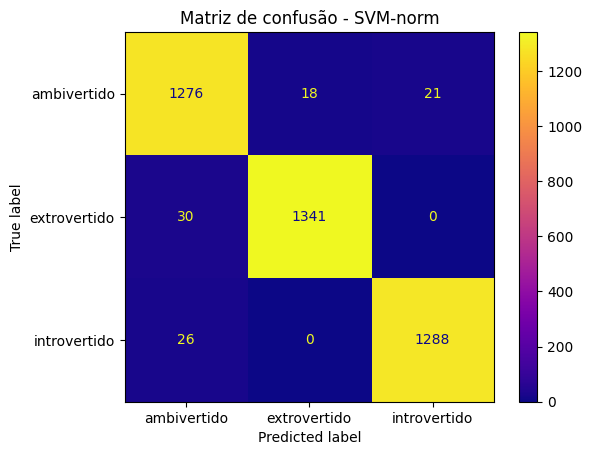


Melhor modelo por F1-weighted: SVM-norm (0.976)
              precision    recall  f1-score   support

 ambivertido       0.96      0.97      0.96      1315
extrovertido       0.99      0.98      0.98      1371
introvertido       0.98      0.98      0.98      1314

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



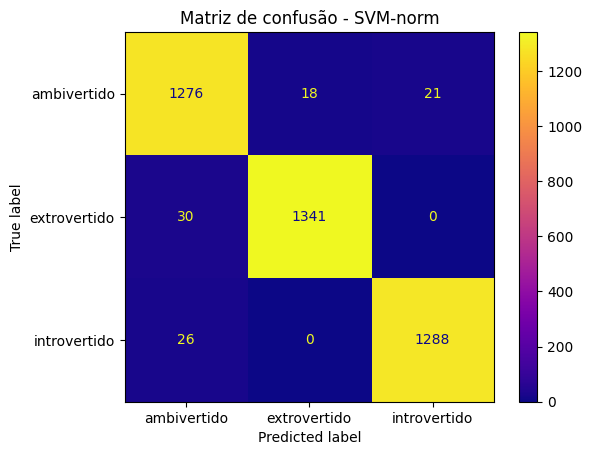

In [26]:
# -------------------------------
# Lista de todos os modelos salvos
# -------------------------------
saved_models = [
    'LR-orig', 'KNN-orig', 'CART-orig', 'NB-orig', 'SVM-orig', 'Bag-orig', 'RF-orig', 'ET-orig', 'Ada-orig', 'GB-orig', 'Voting-orig',
    'LR-padr', 'KNN-padr', 'CART-padr', 'NB-padr', 'SVM-padr', 'Bag-padr', 'RF-padr', 'ET-padr', 'Ada-padr', 'GB-padr', 'Voting-padr',
    'LR-norm', 'KNN-norm', 'CART-norm', 'NB-norm', 'SVM-norm', 'Bag-norm', 'RF-norm', 'ET-norm', 'Ada-norm', 'GB-norm', 'Voting-norm'
]

# -------------------------------
# Selecionar e exibir o melhor modelo por Accuracy
# -------------------------------
best_model_acc, best_model_name_acc, best_acc = selecionar_melhor_modelo(saved_models, X_test, y_test, metric='accuracy')
print(f"\nMelhor modelo por Accuracy: {best_model_name_acc} ({best_acc:.3f})")
y_pred_acc = best_model_acc.predict(X_test)
print(classification_report(y_test, y_pred_acc))
try:
    disp = ConfusionMatrixDisplay.from_estimator(best_model_acc, X_test, y_test, cmap=plt.cm.plasma)
    plt.title(f"Matriz de confusão - {best_model_name_acc}")
    plt.show()
except Exception as e:
    print(f"Não foi possível plotar a matriz de confusão para {best_model_name_acc}: {e}")

# -------------------------------
# Selecionar e exibir o melhor modelo por F1-weighted
# -------------------------------
best_model_f1, best_model_name_f1, best_f1 = selecionar_melhor_modelo(saved_models, X_test, y_test, metric='f1_weighted')
print(f"\nMelhor modelo por F1-weighted: {best_model_name_f1} ({best_f1:.3f})")
y_pred_f1 = best_model_f1.predict(X_test)
print(classification_report(y_test, y_pred_f1))
try:
    disp = ConfusionMatrixDisplay.from_estimator(best_model_f1, X_test, y_test, cmap=plt.cm.plasma)
    plt.title(f"Matriz de confusão - {best_model_name_f1}")
    plt.show()
except Exception as e:
    print(f"Não foi possível plotar a matriz de confusão para {best_model_name_f1}: {e}")


Independente da propriedade usada para a comparação das matrizes de confusão, seja acurácia ou f1-score, o modelo **SVM-norm** apresentou o melhor resultado para cada atributo, ou seja classifica introvertido, extrovertido e ambivertido sem viéses.

# **6) Finalização do Modelo**

In [29]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = SVC(
    C=100,
    gamma='scale',
    kernel='linear',
    probability=True,
    random_state=SEED
)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.97625


A acurácia estimada do modelo, considerando o conjunto de teste, se mantêm em **97,6%**.

In [30]:
# Preparação do modelo com TODO o dataset
scaler = MinMaxScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

SVC(C=100, kernel='linear', probability=True, random_state=42)

Com essa etapa, o modelo está pronto, considerando todas as entradas existentes no dataset.

# **7) Conclusões e próximos passos**

O modelo que apresentou melhor resultado foi o da **Support Vector Machine (SVM)**, que teve uma acurácia aproximadamente três maior que o **baseline**.

O dataset usado neste trabalho é sintético, apresentando uma qualidade de dados de entrada bons e talvez seja artificial até demais, facilitando o aprendizado de quase todos os modelos.

Uma melhoria futura seria usar esse modelo com a entrada de dados novos, que sejam mais realísticos.